In [133]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-dataset/gold.csv


In [134]:
df = pd.read_csv("../input/gold-dataset/gold.csv")

# Data Exploitation

In [135]:
df.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
1,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
2,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
3,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
4,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4718 non-null   object 
 1   USD (AM)   4718 non-null   float64
 2   USD (PM)   4682 non-null   float64
 3   GBP (AM)   4718 non-null   float64
 4   GBP (PM)   4682 non-null   float64
 5   EURO (AM)  4718 non-null   float64
 6   EURO (PM)  4682 non-null   float64
dtypes: float64(6), object(1)
memory usage: 258.1+ KB


## Check for missing Values

In [137]:
df.isna().sum()

Date          0
USD (AM)      0
USD (PM)     36
GBP (AM)      0
GBP (PM)     36
EURO (AM)     0
EURO (PM)    36
dtype: int64

## Check for Duplicates

In [138]:
df.duplicated().sum()

0

## Convert Date column to DateTime type

In [139]:
df.Date = pd.to_datetime(df.Date)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4718 entries, 0 to 4717
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4718 non-null   datetime64[ns]
 1   USD (AM)   4718 non-null   float64       
 2   USD (PM)   4682 non-null   float64       
 3   GBP (AM)   4718 non-null   float64       
 4   GBP (PM)   4682 non-null   float64       
 5   EURO (AM)  4718 non-null   float64       
 6   EURO (PM)  4682 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 258.1 KB


## Remove missing Values

In [141]:
df = df.dropna()

In [142]:
df.isna().sum()

Date         0
USD (AM)     0
USD (PM)     0
GBP (AM)     0
GBP (PM)     0
EURO (AM)    0
EURO (PM)    0
dtype: int64

## Data Exploration

In [143]:
import seaborn as sns

### Chekc For Correlation

In [144]:
corr = df.corr()

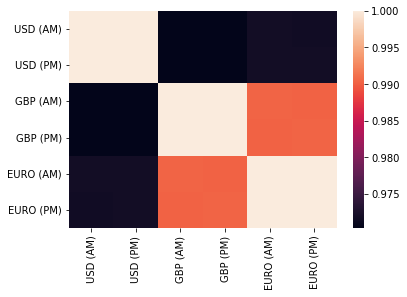

In [145]:
sns.heatmap(corr);

* There is a strong Correlation between GBP and EURO

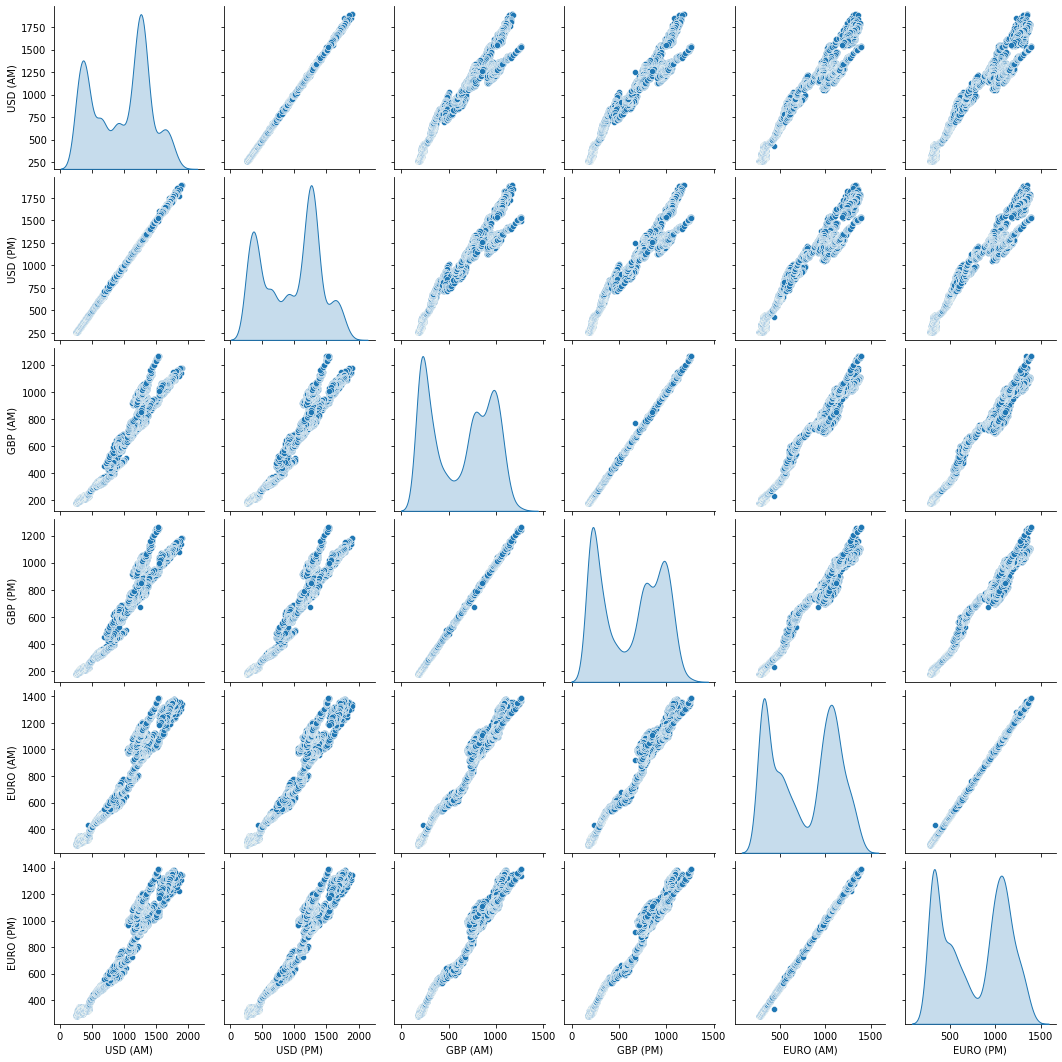

In [146]:
sns.pairplot(data =df , diag_kind = "kde");

* Outliers

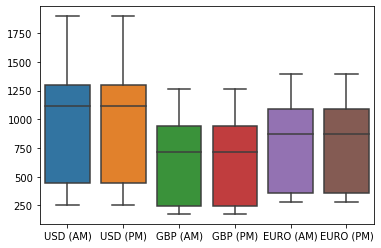

In [147]:
sns.boxplot(data = df);

# Preparing Dataset for gold priceprediction

In [148]:
df1 = df.shift(1)
df1.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
2,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
3,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
4,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882


In [149]:
df2 = df1.shift(1)
df2.head()

,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
3,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
4,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049


In [150]:
df3 = df.merge(df1 , on = df.index , suffixes = ['_0','_1'])
df3.drop('key_0' , axis = 1 , inplace = True)

In [151]:
# help(df.merge)

In [152]:
df_final =df3.merge(df2 , on = df.index)
df_final.drop('key_0' , axis = 1 , inplace = True)

In [153]:
df_final = df_final.iloc[2:,:]

In [154]:
df_final.head()

,Date_0,USD (AM)_0,USD (PM)_0,GBP (AM)_0,GBP (PM)_0,EURO (AM)_0,EURO (PM)_0,Date_1,USD (AM)_1,USD (PM)_1,...,GBP (PM)_1,EURO (AM)_1,EURO (PM)_1,Date,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
2,2001-01-04,268.75,267.1,178.869,178.352,282.538,282.049,2001-01-03,269.00,267.15,...,177.390,281.823,281.655,2001-01-02,272.80,271.10,183.026,181.617,288.677,287.334
3,2001-01-05,268.00,267.4,178.488,178.148,280.775,280.882,2001-01-04,268.75,267.10,...,178.352,282.538,282.049,2001-01-03,269.00,267.15,178.916,177.390,281.823,281.655
4,2001-01-08,268.60,268.3,178.769,178.664,282.410,282.481,2001-01-05,268.00,267.40,...,178.148,280.775,280.882,2001-01-04,268.75,267.10,178.869,178.352,282.538,282.049
5,2001-01-09,267.75,267.0,179.855,179.195,284.507,283.590,2001-01-08,268.60,268.30,...,178.664,282.410,282.481,2001-01-05,268.00,267.40,178.488,178.148,280.775,280.882
6,2001-01-10,266.70,266.3,178.777,178.665,283.573,283.298,2001-01-09,267.75,267.00,...,179.195,284.507,283.590,2001-01-08,268.60,268.30,178.769,178.664,282.410,282.481


# Making Our model

In [155]:
X = df_final.drop(['USD (AM)_0','Date_0','Date_1','Date' ], axis = 1 )

In [156]:
y = df_final['USD (AM)_0']

In [157]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X,y)

In [158]:
from sklearn.linear_model import LinearRegression

In [159]:
model = LinearRegression()

In [160]:
model.fit(X_train ,y_train)

LinearRegression()

In [161]:
y_pred = model.predict(X_test)

In [162]:
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

In [164]:
print("R2 Score is : {:03f}".format(r2_score(y_test ,y_pred)))
print("Root Mean Squared Error is : {:03f}".format(mean_squared_error(y_test ,y_pred , squared = False)))
print("Mean Absolute Error is : {:03f}".format(mean_absolute_error(y_test ,y_pred)))

R2 Score is : 0.999959
Root Mean Squared Error is : 2.885205
Mean Absolute Error is : 1.981975
